## Importing Necessary Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model  # Corrected line
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
tf.config.list_physical_devices('GPU')

[]

## Loading and Preprocessing Data 

In [7]:
train_path = r"C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Train"
val_path = r"C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Validation"
test_path = r"C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Test"

datagen = ImageDataGenerator(brightness_range=[0.3,1.5],rescale=1.0/255.0)

train_it = datagen.flow_from_directory(train_path, batch_size=32,target_size=(256, 256), class_mode="binary")
val_it = datagen.flow_from_directory(val_path, batch_size=10, target_size=(256, 256), class_mode="binary")
test_it = datagen.flow_from_directory(test_path, batch_size=10, target_size=(256, 256), class_mode="binary")

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Creating the Model

In [8]:
def create_model():

    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), activation = "relu",input_shape=(256,256,3)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = "relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = "relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation = "relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = "sigmoid"))
    
    model.summary()
    
    return model

In [9]:
model = create_model()

c:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\python3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638,721 (6.25 MB)

 Trainable params: 1,638,721 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import graphviz
import pydot
plot_model(model, to_file='multilayer_perceptron_graph.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
print("Model Compiled!")

Model Compiled!


## Training the Model 

In [ ]:
# ✅ Use the modern .keras extension for saving the entire model
filepath = r"C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Model\model_best.keras"

# The ModelCheckpoint callback saves the best model during training
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# The EarlyStopping callback stops training when performance plateaus
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

callbacks_list = [earlystop, checkpoint]

# Train the model
training_history = model.fit(train_it, 
                             epochs=10, 
                             steps_per_epoch=312, 
                             validation_data=val_it, 
                             callbacks=callbacks_list)

print("Model Trained!")


# 💡 Optional: If you use the .keras format, you don't need to save the architecture separately.
# The .keras file already contains everything. You can save the final model state like this:
model.save(r"C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Model\model_final.keras")
print("Final model saved successfully!")

c:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\python3.11\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.8681 - loss: 0.3110
Epoch 1: val_accuracy improved from None to 0.97125, saving model to C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Model\model_best.keras
312/312 ━━━━━━━━━━━━━━━━━━━━ 186s 591ms/step - accuracy: 0.9255 - loss: 0.1969 - val_accuracy: 0.9712 - val_loss: 0.0973
Epoch 2/10
  1/312 ━━━━━━━━━━━━━━━━━━━━ 1:23 269ms/step - accuracy: 0.9688 - loss: 0.0813

c:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\python3.11\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.97125
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9688 - loss: 0.0813 - val_accuracy: 0.9700 - val_loss: 0.1016
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9621 - loss: 0.1032
Epoch 3: val_accuracy improved from 0.97125 to 0.97500, saving model to C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Model\model_best.keras
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 301ms/step - accuracy: 0.9656 - loss: 0.0942 - val_accuracy: 0.9750 - val_loss: 0.0737
Epoch 4/10
  1/312 ━━━━━━━━━━━━━━━━━━━━ 1:20 258ms/step - accuracy: 1.0000 - loss: 0.0308
Epoch 4: val_accuracy improved from 0.97500 to 0.97750, saving model to C:\Users\sinha\Desktop\Realtime-Face-Mask-Verification-main\Model\model_best.keras
312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 1.0000 - loss: 0.0308 - val_accuracy: 0.9775 - val_loss: 0.0700
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.9776 - loss: 0.0628
Epoch 5: val_acc

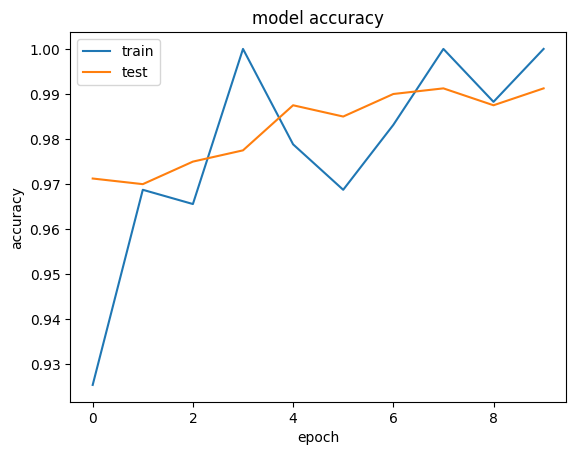

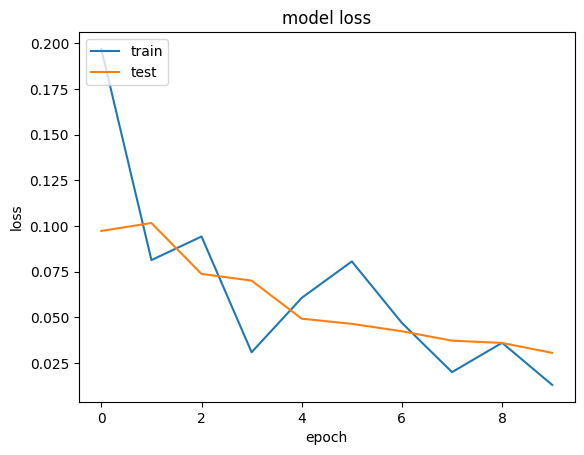

In [13]:
# summarize history for training and validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluating the Model

In [14]:
scores = model.evaluate(test_it)
print("Model Evaluated with accuracy:", scores[1]*100, "%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.9889 - loss: 0.0394
Model Evaluated with accuracy: 98.89112710952759 %


## Detecting Face Locations

In [15]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def face_detection_frame(img, x, y, w, h, prediction):
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=6)
    output = []
    
    for (x,y,w,h) in faces:
        cropped_image = img[y:y+h, x:x+w]
        img_arr = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (256,256), interpolation = cv2.INTER_AREA)
        img_arr = np.expand_dims(img_arr, 0)
        prediction = model.predict(img_arr)
        output.append([x,y,w,h,prediction])
    return output

## Reading from Camera

In [ ]:
import cv2
import numpy as np

# --- SETUP (Do this ONCE before the loop) ---

# 1. Load your trained face mask model (assuming you have one)
# from tensorflow.keras.models import load_model
# model = load_model("path/to/your/model.h5") 

# 2. Load the face detection cascade with the correct path and error check
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(face_cascade_path)

if face_cascade.empty():
    raise IOError(f"Unable to load the face cascade classifier xml file from {face_cascade_path}")

# --- Your Detection Function ---
# This is a likely implementation of your missing function.
# It should find faces first, then run your mask prediction model on each face.
def face_detection_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    predictions = []
    for (x, y, w, h) in faces:
        # Here you would preprocess the face ROI and predict with your model
        # For this example, we'll just generate a fake prediction
        prediction_score = np.random.rand() # Replace with: model.predict(face_roi)
        predictions.append((x, y, w, h, prediction_score))
        
    return predictions


# --- MAIN LOOP ---

# Define a video capture object
vid = cv2.VideoCapture(0)
itera = 0
output = [] # Store the last known detections

while(True):
    ret, frame = vid.read()
    if not ret:
        break # Break the loop if the frame is not captured

    # Only run the heavy detection function every 5 frames for efficiency
    itera += 1
    if itera % 5 == 0:
        # The function now returns the new detections
        output = face_detection_frame(frame)
    
    # Draw the results from the last successful detection on every frame
    if output:
        for (x, y, w, h, prediction) in output:
            # If without mask
            if prediction > 0.5:
                label = 'No Mask'
                color = (0, 0, 255) # Red
            # If with mask
            else:
                label = 'Mask'
                color = (0, 255, 0) # Green

            # Draw the label and bounding box
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    # Display the resulting frame
    cv2.imshow('Face Mask Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

## Reading from a Video File

In [17]:
import cv2
x = -100
y = -100
w = 0 
h = 0
prediction = 0

cap = cv2.VideoCapture("video.mp4")
itera = 0 
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        
        itera += 1
        if itera % 5 == 0 or itera <=5 :

            #Function implementation
            output = face_detection_frame(frame, x, y, w, h, prediction)
        
        for (x,y,w,h,prediction) in output:
            #During the 5 frames we produce the same output of the last function implementation
            if prediction > 0.5 : #If without mask
                cv2.putText(img=frame, text='without mask', org=(x, y+h+30), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 0, 255),thickness=2)
                frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

            else :                #If with mask
                cv2.putText(img=frame, text='with mask', org=(x, y+h+30), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 0, 255),thickness=2)
                frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
 
        out.write(frame)
        # Display the resulting frame
        cv2.imshow('Frame',frame)
 
        # Press Q on keyboard to  exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
 
  # Break the loop
    else: 
        break
# When everything done, release the video capture object
cap.release()
out.release()
# Closes all the frames
cv2.destroyAllWindows()

TypeError: face_detection_frame() takes 1 positional argument but 6 were given